<a href="https://colab.research.google.com/github/sayaliKutwal/Computer-Vision-Nanodegree-Exercises/blob/master/1.%20Introduction%20to%20Computer%20Vision/4_Green_Screen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Threshold, Green Screen

# Import resources

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

Link for car image https://github.com/sayaliKutwal/CVND_Exercises/blob/master/1_1_Image_Representation/images/car_green_screen.jpg  

# Read in and display the image

This image is:  (450, 660, 3)


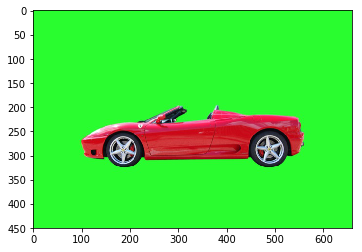

In [8]:
# Read in the image
image = mpimg.imread('car_green_screen.jpg')

# Print out the image dimension
print('This image is: ', image.shape)

# Display the image
plt.imshow(image)

# Define the color threshold

In [0]:
# Define the color selection boundaries in RGB values
lower_green = np.array([0,230,0])
upper_green = np.array([255, 255, 255])

# Create mask

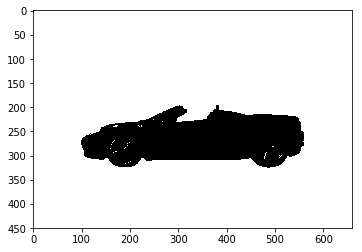

In [41]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Visualize the mask
plt.imshow(mask, cmap='gray')

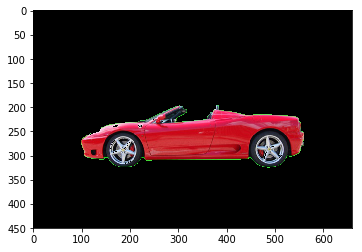

In [42]:
# Mask the image to let the car show through
masked_image = np.copy(image)
masked_image[mask != 0] = [0, 0, 0]

# Display the image
plt.imshow(masked_image)

# Mask and add background image

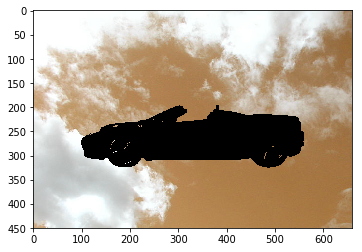

In [43]:
# Load the backgroung image and convert to RGB
bg_image = mpimg.imread('sky.jpg')
bg_image = cv2.cvtColor(bg_image, cv2.COLOR_BGR2RGB)

## TODO: Crop it or resize the background to be the right size (450x660)
# Crop the bg_image to 450*660 size
crop_bg = bg_image[:450, :660]

## TODO: Mask the cropped background so that the pizza area is blocked
# Hint mask the opposite area of the previous image
# Mask the cropped bg so the car is blocked
crop_bg[mask == 0] = [0, 0, 0]

## TODO: Display the background and make sure 
# Display the background
plt.imshow(crop_bg)

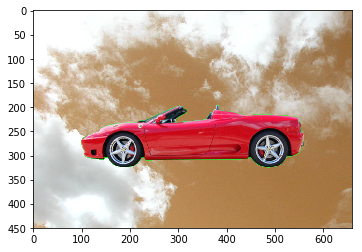

In [44]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_bg

# Display the result
plt.imshow(complete_image)